In [1]:
import h5py
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gdp
from shapely.affinity import translate

import cartopy.crs as ccrs
import cartopy

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
%matplotlib inline

In [2]:
# ASI PRISMA and EO-1 HYPERION
df = pd.DataFrame(
    {'Probe': ['Land', 'Water', 'Wood'],
     'Color': ['#de6b00','#1f78b4','#3FB54B'],
     'Latitude': [-8.61482,-8.7912,-8.7040],
     'Longitude': [116.86549,116.7894,116.8355]})
gdf = gdp.GeoDataFrame(df, crs="EPSG:4326", geometry=gdp.points_from_xy(df.Longitude, df.Latitude))
# sort by label if needed
gdf = gdf.sort_values(by='Probe')
# save to file
gdf.to_file("probs.json", driver="GeoJSON")
gdf

,Probe,Color,Latitude,Longitude,geometry
0,Land,#de6b00,-8.61482,116.86549,POINT (116.86549 -8.61482)
1,Water,#1f78b4,-8.79120,116.78940,POINT (116.78940 -8.79120)
2,Wood,#3FB54B,-8.70400,116.83550,POINT (116.83550 -8.70400)


## Read ASI PRISMA HDF5 Dataset

In [3]:
data = h5py.File("PRS_L2C_STD_20200413023942_20200413023947_0001.he5", mode='r')

## Explore Metadata

In [4]:
dict(data.attrs)

{'Acquisition_Purpose': b'NOT SPECIAL PRODUCT',
 'Acquisition_Size': b'30 Km',
 'Acquisition_Station': b'CNM',
 'Acquisition_Type': b'EARTH OBSERVATION',
 'Atm_LutGeomInfo_RelativeAzimuth': array([b'RAA_000', b'RAA_025'], dtype=object),
 'Atm_LutGeomInfo_SunZenith': array([b'SZA_020', b'SZA_035'], dtype=object),
 'Atm_LutGeomInfo_ViewZenith': array([b'VZA_000', b'VZA_010'], dtype=object),
 'Atm_Lut_version': b'1.1.2',
 'Atmo_RTM_info': b'MODTRAN6',
 'Atmo_profile_info': b'ATM_TROPICAL',
 'Aux_SunEarthDistance': b'PRS_AUX_D_SUN_20180201000000_21000101000000_0001.xml',
 'Aux_SunIrradiance': b'PRS_AUX_S_IRR_20180201000000_21000101000000_0001.xml',
 'CNM_L2_BINNING': 1,
 'CNM_L2_BIN_ON': 1,
 'CNM_L2_BSEL_ON': 0,
 'CNM_L2_HGRP': 1,
 'CNM_PAN_ACQ': 1,
 'CNM_SWIR_ACQ': 1,
 'CNM_SWIR_SELECT': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [5]:
# VNIR bands
print(data.attrs["List_Cw_Vnir"])

[  0.        0.        0.      972.363   961.9864  951.0537  939.581
 929.1146  918.8958  908.3581  897.69775 886.9772  876.3521  865.6651
 854.8984  844.1448  833.47064 822.8654  812.25995 801.65607 791.0828
 780.6373  770.2539  759.8194  749.4574  739.14557 728.9768  718.9051
 708.725   698.84216 689.1537  679.21436 669.56165 660.012   650.53937
 641.0816  631.8973  622.9554  613.9373  605.1523  596.2418  587.5951
 579.1278  570.78064 562.51733 554.3481  546.26776 538.28217 530.46466
 522.71313 514.9769  507.46124 499.93707 492.50293 485.2073  477.97662
 470.7497  463.53223 456.18124 448.83722 441.46252 434.1135  426.76874
 419.1647  411.08643 402.2041 ]


In [6]:
# SWIR bands
print(data.attrs["List_Cw_Swir"])

[2496.8254  2489.9897  2483.5498  2476.7383  2469.373   2462.7695
 2456.278   2448.8796  2442.1445  2435.2832  2428.3464  2420.9373
 2414.1165  2407.2852  2399.754   2392.8022  2385.7578  2378.457
 2371.293   2364.326   2356.968   2349.5317  2342.542   2335.1777
 2327.5632  2320.5889  2312.8542  2305.4578  2298.2798  2290.5222
 2283.2312  2275.7126  2267.9927  2260.58    2252.796   2245.1665
 2237.5962  2229.7021  2222.146   2214.2844  2206.5483  2198.8372
 2190.7822  2183.1357  2175.0164  2167.2058  2159.2324  2151.0735
 2143.1775  2135.18    2127.0452  2118.9     2110.7717  2102.4932
 2094.364   2086.0442  2077.7034  2069.4873  2061.0896  2052.707
 2044.3702  2035.9419  2027.4255  2018.9949  2010.3599  2001.7888
 1993.2365  1984.4863  1975.735   1967.0022  1958.3195  1949.5865
 1940.7743  1931.9377  1923.0294  1913.997   1904.5668  1895.7972
 1886.7566  1878.4072  1867.9867  1859.2451  1850.2233  1840.994
 1831.6837  1822.09    1812.7742  1803.3208  1793.6361  1784.3866
 1774.8673  1

In [7]:
# VNIR bands count
len(data.attrs["List_Cw_Vnir"])

66

In [8]:
# SWIR bands count
len(data.attrs["List_Cw_Swir"])

173

## ASI PRISMA Panchromatic 5m

In [9]:
pan_lats = data["HDFEOS"]['SWATHS']["PRS_L2C_PCO"]["Geolocation Fields"]["Latitude"][:]
pan_lons = data["HDFEOS"]['SWATHS']["PRS_L2C_PCO"]["Geolocation Fields"]["Longitude"][:]
pan_image= data["HDFEOS"]['SWATHS']["PRS_L2C_PCO"]["Data Fields"]["Cube"][:]
pan_error= data["HDFEOS"]['SWATHS']["PRS_L2C_PCO"]["Data Fields"]["PIXEL_L2_ERR_MATRIX"][:]
pan_lats.shape, pan_lons.shape, pan_image.shape, pan_error.shape

((6000, 6000), (6000, 6000), (6000, 6000), (6000, 6000))

In [10]:
ds_pan = xr.Dataset({'Panchromatic':(('x', 'y'),pan_image/65535),
                     'Panchromatic_Error':(('x', 'y'),pan_error)},
                    coords={'xc': (('x', 'y'), pan_lons),
                            'yc': (('x', 'y'), pan_lats)},
                    attrs={'description': 'PRISMA Panchromatic 5m Reflectance'})
print (ds_pan)

<xarray.Dataset>
Dimensions:             (x: 6000, y: 6000)
Coordinates:
    xc                  (x, y) float64 117.0 117.0 117.0 ... 116.7 116.7 116.7
    yc                  (x, y) float64 -8.6 -8.6 -8.6 -8.6 ... -8.81 -8.81 -8.81
Dimensions without coordinates: x, y
Data variables:
    Panchromatic        (x, y) float64 0.4543 0.4745 0.5115 ... 0.1435 0.1435
    Panchromatic_Error  (x, y) uint8 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
Attributes:
    description:  PRISMA Panchromatic 5m Reflectance


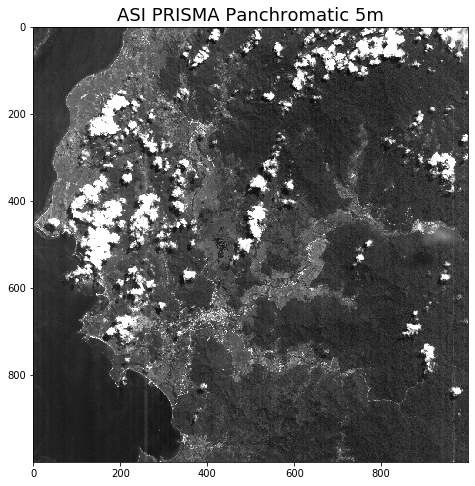

In [11]:
plt.figure(figsize=(8,8))
plt.title('ASI PRISMA Panchromatic 5m',fontsize=18)
plt.imshow(np.rot90(ds_pan.Panchromatic[::6,::6], k=3),cmap="Greys_r")
plt.show()

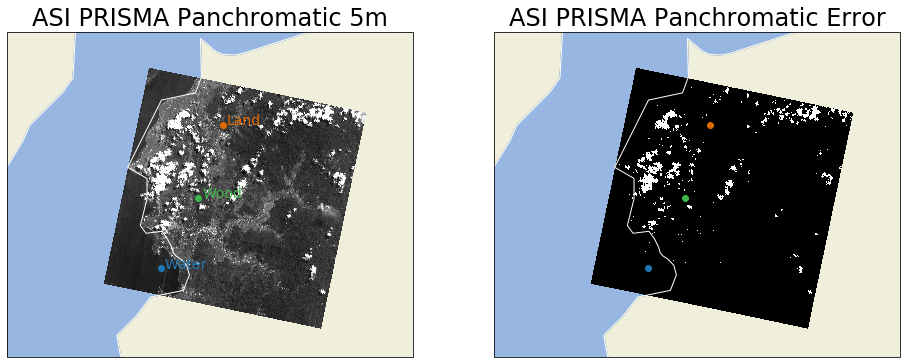

In [20]:
plt.figure(figsize=(16,6))

delta = 0.005

# Panchromatic
ax1 = plt.subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='10m', color='white')
ax1.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='k')
ax1.add_feature(cartopy.feature.OCEAN, zorder=0, edgecolor='lightblue')
ax1.set_global()
ds_pan.Panchromatic[::6,::6].plot.pcolormesh(ax=ax1, transform=ccrs.PlateCarree(), x='xc', y='yc',
                                             cmap="Greys_r", add_colorbar=False)
ax1.set_xlim([116.6,117.1])
ax1.set_ylim([-8.9,-8.5])
ax1.set_title('ASI PRISMA Panchromatic 5m', fontsize=24)

gdf.apply(lambda x: ax1.annotate(xy=translate(x.loc['geometry'],delta).coords[0],
                                 s=x.Probe, color=x.Color, fontsize=14), axis=1)
gdf.apply(lambda x: ax1.scatter(*x.loc['geometry'].coords[0], c=x.Color), axis=1)

# Error mask
ax2 = plt.subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax2.coastlines(resolution='10m', color='white')
ax2.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='k')
ax2.add_feature(cartopy.feature.OCEAN, zorder=0, edgecolor='lightblue')
ax2.set_global()
ds_pan.Panchromatic_Error[::6,::6].plot.pcolormesh(ax=ax2, transform=ccrs.PlateCarree(), x='xc', y='yc',
                                                   cmap="Greys_r", add_colorbar=False)
ax2.set_xlim([116.6,117.1])
ax2.set_ylim([-8.9,-8.5])
ax2.set_title('ASI PRISMA Panchromatic Error', fontsize=24)

gdf.apply(lambda x: ax2.scatter(*x.loc['geometry'].coords[0], c=x.Color), axis=1)

plt.savefig('ASI PRISMA Panchromatic 5m.jpg', dpi=150, bbox_inches='tight')
plt.show()

## ASI PRISMA VNIR and SWIR Bands 30m

In [13]:
band_lats = data["HDFEOS"]['SWATHS']["PRS_L2C_HCO"]["Geolocation Fields"]["Latitude"][:]
band_lons = data["HDFEOS"]['SWATHS']["PRS_L2C_HCO"]["Geolocation Fields"]["Longitude"][:]
band_lats.shape, band_lons.shape

((1000, 1000), (1000, 1000))

In [14]:
vnir_image= data["HDFEOS"]['SWATHS']["PRS_L2C_HCO"]["Data Fields"]["VNIR_Cube"][:]
vnir_error= data["HDFEOS"]['SWATHS']["PRS_L2C_HCO"]["Data Fields"]["VNIR_PIXEL_L2_ERR_MATRIX"][:]
vnir_image.shape, vnir_error.shape, len(data.attrs["List_Cw_Vnir"])

((1000, 66, 1000), (1000, 66, 1000), 66)

In [15]:
swir_image= data["HDFEOS"]['SWATHS']["PRS_L2C_HCO"]["Data Fields"]["SWIR_Cube"][:]
swir_error= data["HDFEOS"]['SWATHS']["PRS_L2C_HCO"]["Data Fields"]["SWIR_PIXEL_L2_ERR_MATRIX"][:]
swir_image.shape, swir_error.shape, len(data.attrs["List_Cw_Swir"])

((1000, 173, 1000), (1000, 173, 1000), 173)

In [16]:
import xarray as xr
ds_bands = xr.Dataset({'VNIR':(('x', 'band_vnir','y'),vnir_image/65535),
                 'VNIR_Error':(('x', 'band', 'y'),vnir_error),
                 'SWIR':(('x', 'band_swir','y'),swir_image/65535),
                 'SWIR_Error':(('x', 'band_swir', 'y'),swir_error)},
                    coords={'xc': (('x', 'y'), band_lons),
                            'yc': (('x', 'y'), band_lats),
                            'band_vnir': data.attrs["List_Cw_Vnir"],
                            'band_swir': data.attrs["List_Cw_Swir"]},
                    attrs={'description': 'PRISMA VNIR and SWIR 30m Reflectance'})
print (ds_bands)

<xarray.Dataset>
Dimensions:     (band: 66, band_swir: 173, band_vnir: 66, x: 1000, y: 1000)
Coordinates:
    xc          (x, y) float64 117.0 117.0 117.0 117.0 ... 116.7 116.7 116.7
    yc          (x, y) float64 -8.6 -8.6 -8.6 -8.601 ... -8.809 -8.809 -8.81
  * band_vnir   (band_vnir) float32 0.0 0.0 0.0 ... 419.1647 411.08643 402.2041
  * band_swir   (band_swir) float32 2496.8254 2489.9897 2483.5498 ... 0.0 0.0
Dimensions without coordinates: band, x, y
Data variables:
    VNIR        (x, band_vnir, y) float64 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0
    VNIR_Error  (x, band, y) uint8 1 1 1 1 1 1 1 1 1 1 1 ... 4 4 4 4 4 4 4 4 4 4
    SWIR        (x, band_swir, y) float64 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0
    SWIR_Error  (x, band_swir, y) uint8 4 4 4 4 4 4 4 4 4 ... 1 1 1 1 1 1 1 1 1
Attributes:
    description:  PRISMA VNIR and SWIR 30m Reflectance


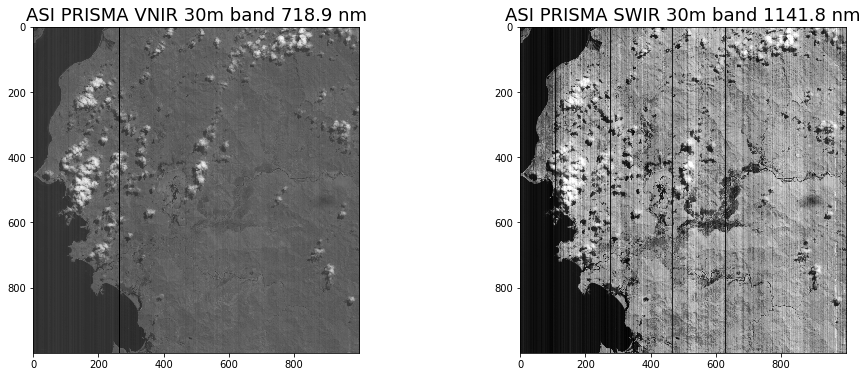

In [17]:
plt.figure(figsize=(16,6))

ax1 = plt.subplot(1, 2, 1)
band_vnir = 27
wavelength = float(ds_bands.VNIR[:,band_vnir,:].band_vnir)
ax1.set_title('ASI PRISMA VNIR 30m band %.1f nm' % wavelength,fontsize=18)
ax1.imshow(np.rot90(ds_bands.VNIR[:,band_vnir,:], k=3),cmap="Greys_r")

ax2 = plt.subplot(1, 2, 2)
band_swir = 150
wavelength = float(ds_bands.SWIR[:,band_swir,:].band_swir)
ax2.set_title('ASI PRISMA SWIR 30m band %.1f nm' % wavelength,fontsize=18)
ax2.imshow(np.rot90(ds_bands.SWIR[:,band_swir,:], k=3),cmap="Greys_r")

plt.show()

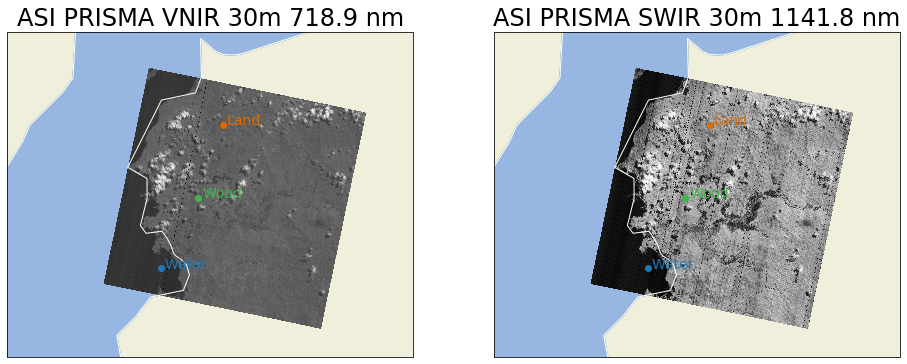

In [18]:
plt.figure(figsize=(16,6))

delta = 0.005

band_vnir = 27
wavelength = float(ds_bands.VNIR[:,band_vnir,:].band_vnir)

ax1 = plt.subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax1.coastlines(color='white')
ax1.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='k')
ax1.add_feature(cartopy.feature.OCEAN, zorder=0, edgecolor='lightblue')
ax1.set_global()
ds_bands.VNIR[:,band_vnir,:].plot.pcolormesh(ax=ax1, transform=ccrs.PlateCarree(), x='xc', y='yc', cmap="Greys_r", add_colorbar=False)
ax1.set_xlim([116.6,117.1])
ax1.set_ylim([-8.9,-8.5])
ax1.set_title('ASI PRISMA VNIR 30m %.1f nm' % wavelength,fontsize=24)
# Probs
gdf.apply(lambda x: ax1.annotate(xy=translate(x.loc['geometry'],delta).coords[0],
                                 s=x.Probe, color=x.Color, fontsize=14), axis=1)
gdf.apply(lambda x: ax1.scatter(*x.loc['geometry'].coords[0], c=x.Color), axis=1)

band_swir = 150
wavelength = float(ds_bands.SWIR[:,band_swir,:].band_swir)

ax2 = plt.subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax2.coastlines(color='white')
ax2.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='k')
ax2.add_feature(cartopy.feature.OCEAN, zorder=0, edgecolor='lightblue')
ax2.set_global()
ds_bands.SWIR[:,band_swir,:].plot.pcolormesh(ax=ax2, transform=ccrs.PlateCarree(), x='xc', y='yc',
                                             cmap="Greys_r", add_colorbar=False)
ax2.set_xlim([116.6,117.1])
ax2.set_ylim([-8.9,-8.5])
ax2.set_title('ASI PRISMA SWIR 30m %.1f nm' % wavelength,fontsize=24)
# Probs
gdf.apply(lambda x: ax2.annotate(xy=translate(x.loc['geometry'],delta).coords[0],
                                 s=x.Probe, color=x.Color, fontsize=14), axis=1)
gdf.apply(lambda x: ax2.scatter(*x.loc['geometry'].coords[0], c=x.Color), axis=1)

plt.savefig('ASI PRISMA VNIR and SWIR Bands.jpg', dpi=150, bbox_inches='tight')
plt.show()

## ASI PRISMA Spectrogram of Probe Locations

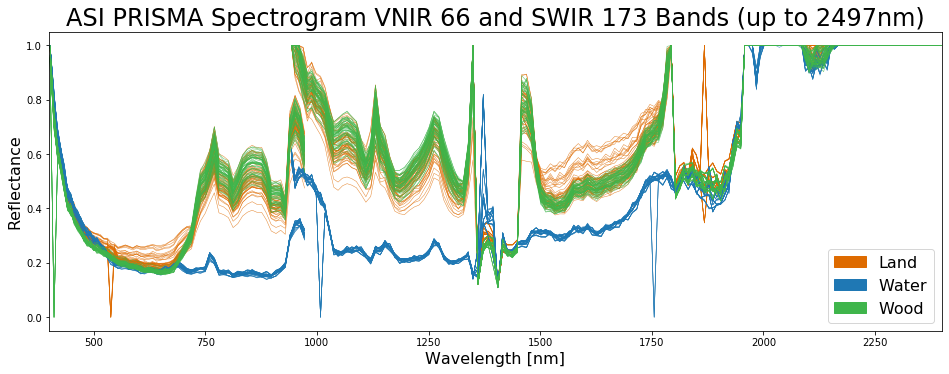

In [19]:
plt.figure(figsize=(16,5.5))
plt.title('ASI PRISMA Spectrogram VNIR %d and SWIR %d Bands (up to %.0fnm)' %
              (len(data.attrs["List_Cw_Vnir"]),len(data.attrs["List_Cw_Swir"]),
              float(ds_bands.band_swir.max())),fontsize=24)
ax = plt.gca()

# for manual legend
patches = []
delta = 1e-3

# plot probes
for (idx,row) in gdf.iterrows():
    #print (row.Probe)
    
    probe = row.Probe
    coords = row.geometry.coords[0]
    color = row.Color

    patches.append(mpatches.Patch(color=color, label=probe))
    ds_bands_subset = ds_bands.where((ds_bands.xc>=coords[0]-delta) & (ds_bands.xc<=coords[0]+delta) & \
                      (ds_bands.yc>=coords[1]-delta) & (ds_bands.yc<=coords[1]+delta),drop=True)

    vnir_subset = ds_bands_subset[['VNIR']].to_dataframe().reset_index().dropna()
    vnir_subset = vnir_subset[vnir_subset.band_vnir>0]

    swir_subset = ds_bands_subset[['SWIR']].to_dataframe().reset_index().dropna()
    swir_subset = swir_subset[swir_subset.band_swir>0]

    ax = plt.gca()
    for key, grp in vnir_subset.groupby(['xc','yc']):
        grp.plot(ax=ax, kind='line', x='band_vnir', y='VNIR', color=color,lw=0.5,alpha=0.8)
    for key, grp in swir_subset.groupby(['xc','yc']):
        grp.plot(ax=ax, kind='line', x='band_swir', y='SWIR', color=color,lw=0.5,alpha=0.8)
    ax.get_legend().remove()

plt.legend(handles=patches, loc='lower right', fontsize=16)

plt.xlabel("Wavelength [nm]",size=16)
plt.ylabel("Reflectance",size=16)
plt.xlim([400,2400])
plt.savefig('ASI PRISMA Spectrogram VNIR and SWIR Bands.jpg', dpi=150, bbox_inches='tight')
plt.show()